## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [ CONCLUSION SUMMARY](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

# keys to not forget
**treatment--> new_page --encoded as-- 1**<br>
**control ---> old_page --encoded as-- 0**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
rows_num=df.shape[0]
rows_num

294478

c. The number of unique users in the dataset.

In [4]:
#df['user_id'].duplicated().any()
user_num=df.user_id.nunique()
user_num

290584

d. The proportion of users converted.

In [5]:
n_userconverted=df.query('converted==1')['user_id'].nunique()
prop=(n_userconverted/user_num)*100
print(str(int(prop))+'%')

12%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#one of them exist but not together
#first case 
first=df[(df.group =="treatment") & (df.landing_page != "new_page")]
#second case
second=df[(df.group !="treatment") & (df.landing_page == "new_page")]
first.count()[0]+second.count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# removing the rows that we are not confident about their data accuracy
df1 = df.drop(first.index)
df2 = df1.drop(df1[(df.group =="control") & (df1.landing_page != "old_page")].index)

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
dfd = df2[df2.duplicated(['user_id'])]['user_id']
dfd.values[0]

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'] , keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
df2[df2.duplicated(['user_id'] , keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1899 to 2893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       2 non-null      int64 
 1   timestamp     2 non-null      object
 2   group         2 non-null      object
 3   landing_page  2 non-null      object
 4   converted     2 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 96.0+ bytes


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.shape

(290585, 5)

In [15]:
df2.drop_duplicates(subset=['user_id'] , inplace=True);

In [16]:
df2.shape

(290584, 5)

In [17]:
df2.duplicated().any()

False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#number of control and converted
cont_conv=df2[(df2.group =="control") & (df2.converted == 1)].count()[0]
# number of converted
conv=df2[(df2.group =="control")].count()[0]
prop_control=cont_conv/conv
prop_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#number of control and converted
treat_conv=df2[(df2.group =="treatment") & (df2.converted == 1)].count()[0]
# number of converted
conv=df2[(df2.group =="treatment")].count()[0]
prop_treat=treat_conv/conv
prop_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
#number of users receive newpage
newpage=df2[(df2.landing_page =="new_page")].count()[0]
#number of users
usernum2=df2.shape[0]

prop_newpage=newpage/usernum2
prop_newpage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

this is not a sufficient evidence because the probabilities are approximatly equal 
for those that were control and converted =0.1203 aprox=0.12
those who were treatment and converted = 0.1188 aprox= 0.12

not to mention the prob of those received who received a new page are 0.5 that makes those who dont aprox a  0.5 also which doesnt give enough information

the test might be  a simpson paradox problem it need further investigation and new methedology for the tests

# -------------------------------------------------------------------------------------------

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**H0 null = p_old is better (p_old mean >= p_new mean)**

**H1 Alt=  p_new is better**

**alpha Error type 1  (choosing H1 while H0 is true )= 5%**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#null hypothesis (initially true )
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#null hypothesis beleives to be true initially
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
#number of users have new page
n_new=df2[(df2.landing_page =="new_page")].count()[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
#number of users have old page
n_old=df2[(df2.landing_page =="old_page")].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#size of transactions =n_new = 145310
#prob =p_new
#[0,1]
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#size= n_old =145274
#prob= p_old
#[0,1]
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new_diff_p_old=new_page_converted.mean() - old_page_converted.mean()  # diff in mean value
p_new_diff_p_old

-0.0008004206606764819

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

ref= https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa/modules/7f5081ca-b9e5-4662-babc-b2a30e4dc31a/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/f7c0b643-82b1-44ca-ab0d-a2907fd5a4ff

In [29]:
#by bootstrapping 
p_diffs=[]
for _ in range(10000):
    #bootstrap samples of new
    new_page_converted = np.random.binomial(1, p_new, n_new)
    #bootstrap samples of old 
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean()- old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
#we can make a  confidence intervals 
low , upper =np.percentile(p_diffs,2.5),np.percentile(p_diffs,97.5) #95% 

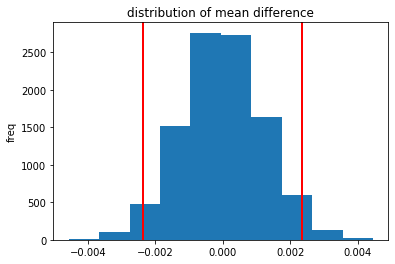

In [31]:
plt.hist(p_diffs);
plt.title("distribution of mean difference")

plt.ylabel('freq')
plt.axvline(x=low ,color='red',linewidth=2)
plt.axvline(x=upper ,color='red',linewidth=2)

# using std to make null hypothesis

ref=https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa/modules/7f5081ca-b9e5-4662-babc-b2a30e4dc31a/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/8b7fed19-7cd8-4e91-8d04-fd6ac5488813

Text(0.5, 1.0, 'distribution of mean difference')

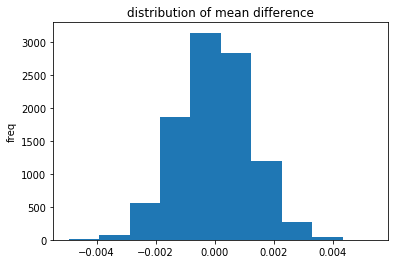

In [32]:
# using null hypothesis 
nulls = np.random.normal(0, np.std(p_diffs),10000)
plt.hist(nulls);
plt.ylabel('freq')
plt.title("distribution of mean difference")

#### yes as After bootstrapping , the distribution of difference in means (central limit theorem) follow the normal distribution 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

ref=https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa/modules/7f5081ca-b9e5-4662-babc-b2a30e4dc31a/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/8d45eff6-5278-4f69-8440-6569ef1628b2

In [33]:
# actual mean diff 
newpage_actual=df2[(df2.landing_page =="new_page")]['converted']
#cont_conv_actual.mean()
oldpage_actual=df2[(df2.landing_page =="old_page")]['converted']
#treat_conv_actual.mean()
# actual mean diff 
actualmean_diff=newpage_actual.mean()-oldpage_actual.mean()

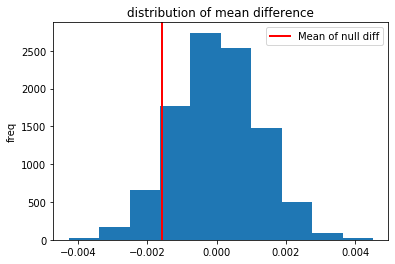

In [34]:
nulls = np.random.normal(0, np.std(p_diffs),10000)
plt.hist(nulls);
plt.title("distribution of mean difference")
plt.ylabel('freq')
plt.axvline(x=actualmean_diff ,color='red',linewidth=2,label='Mean of null diff')
plt.legend()

In [35]:
#proportion of the p_diffs are greater than the actual difference observed
#The definition of a p-value is the probability 
             #of observing your statistic (or one more extreme in favor of the alternative) 
             #if the null hypothesis is true.

        
        # this means that all values on the left represent the H1
# the p-value
(np.array(p_diffs) > actualmean_diff).mean()

0.9065

In [36]:
(nulls > actualmean_diff).mean()

0.9073

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**


**this value is called p-value**
-----------------------------------------------------

**p-value =  aprox 0.9 using bootstrapping**

**p-value =  aprox 0.9 using Null hypothesis**

-------------------------------------------


**the threshold set for the alpha (type 1 error ) is 0.05 which means <br>
if p-value <=0.05 We reject the null hypothesis  , choosing H1 <br>
if p-value >0.05  We fail to reject the null hypothesis choosing H0 <br>
this p-value =0.89 which is alot bigger than the threshold which means the Null Hypothesis is right and alternative is wrong**

**the decision is to keep the old page** 



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old =df2[(df2['landing_page'] =="old_page") & (df2['converted'] == 1)].count()[0] 
convert_new = df2[(df2['landing_page'] =="new_page") & (df2['converted'] == 1)].count()[0]
n_old = oldpage_actual.count()
n_new = newpage_actual.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

ref= https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

In [38]:
stat, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new],alternative='smaller')
stat, p_value
                            #test statistic for the z-test
                            #smaller means that the alternative hypothesis is prop < value  ,as showed in the previous plot 
                            #all values on the left represent the H1

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**


**yes they agree with the findings**<br>
**the p-value is still aprox the same  which tells us that the H0 (old page) is still better**<br>

**the z-score measure the std which gives us a spreadness indication that the conversion rates of the old and new pages is above the mean with 1.3 std**



# ------------------------------------------------------------------------------

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

**logestic regression as it is a good classification model  as we only have 0 or 1 classes  (predicting catagorical response)**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

ref = https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa/modules/7f5081ca-b9e5-4662-babc-b2a30e4dc31a/lessons/b7ae43e6-204a-4816-a177-6c75115cae5f/concepts/28777848-e025-4ffe-aea6-9c08d814512a

In [39]:
#df2.head()

In [40]:
#create intercept column
df2['intercept']=1
#mapping landing page into dummy variables newpage =1 oldpage =0
# since tratment aligned with new_page  and control is aligned with old_page
# treatment =1   old_page = 0  
# making them all at same column ab_page
df2['ab_page']=df2['landing_page'].replace(to_replace=['new_page', 'old_page'],value=[1,0])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
LR = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = LR.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:46:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**


**ab_page p-value = 0.19   which is less than the alpha that means we fail to reject the null H0  so we choose old_page**

**why it is different** <br>
ref=https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/#:~:text=To%20get%20the%20p%2Dvalue,is%20P(%3E2.67)

ref=https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/#:~:text=A%20one%2Dtailed%20test%20has,2.5%25)%20in%20each%20tail.

the logestic regression is classifying 2 samples using difference between them unlike in part 2 where its only average conversion rate difference in other words the logestic regression performs two tailed test 

we can get the p-value in part one 

1-(regression p-value/2)  we divide by 2 to get one side<br>
1-(0.19/2)= 0.905 which is approx 0.9   

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**<br>
we need to look at different features because till now the H0 is failed to be rejected and we are prefering to keep the old page , but as we saw in part one the probabilities are approximatly equal for those that were control and converted =0.1203 aprox=0.12 those who were treatment and converted = 0.1188 aprox= 0.12

**the disadvantages can be higher dimensions when adding new features the dimension will increase and can cause a non-linear relation ship which can be a huge problem if we are using linear regression models**

**a heatmap can be a good indicator for the relations between features before adding another**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

ref=https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/4a2ab02d-3ad9-435a-bdac-ecc06b9208aa/modules/7f5081ca-b9e5-4662-babc-b2a30e4dc31a/lessons/b7ae43e6-204a-4816-a177-6c75115cae5f/concepts/c5af4b47-e3b7-47fb-8941-a4abfcc6a665



In [43]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [45]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [46]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [47]:
LR_1 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK' ,'US']])
results = LR_1.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:               1.521e-05
Time:                        15:46:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [48]:
results.params

intercept   -1.996729
UK          -0.040803
US           0.009916
dtype: float64

**from the refrece to interpret the summary values**

**exponentiate the coef to find the multiplicative change in the odds**

In [49]:
print('UK = '+ str(1/np.exp(-0.040803)))
print('US = ' + str(np.exp(0.009916)) )   #1/ to reciprocate and get the unit decrease // because values were less than 1

UK = 1.041646880895979
US = 1.0099653264334902


in comparison to CANADA (baseline) <br>

for every unit decrease in UK , conversion is 1.04 as likely , holding all variables constant <br>
in other words<br>
**UK is 1.04 unit less likely to convert**

**US is 1.01 unit more likely to convert**

**p-values are still larger than alpha**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
# interactions between columns
# since its only 0 ,1  to keep these categories use multiplications to get new feature  
# one 1 will indicate a country that converted to new_page
df_new['UK_page'] = df_new['UK']*df_new['ab_page']
df_new['US_page'] = df_new['US']*df_new['ab_page']
df_new['CA_page'] = df_new['CA']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,UK_page,US_page,CA_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


# the updated part----------------------------------------------------------------

In [51]:

LR_2= sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'UK_page', 'US_page']])
results_2 = LR_2.fit()
results_2.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:               2.417e-05
Time:                        15:46:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0073      0.037     -0.196      0.844      -0.080       0.065
US             0.0045      0.018      0.257      0.797      -0.030       0.039
UK_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_page        0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

In [53]:
print('UK_page = '+ str(1/np.exp(-0.0674)))
print('US_page = ' + str(np.exp(0.0108)) )

UK_page = 1.0697232819209153
US_page = 1.010858530520097


in comparison to CANADA , those who got treatment<br>
**Uk is 1.1 unit less likely to convert**

**US is 1.01 unit more likely to convert**

**p-values are still larger than alpha**

<a id='conclusions'></a>
# Conclusion Summary
### statistical reasoning 

**from part 1 to the end the p-value failed to reject the H0 , leaving us to choose old_page**
**there is no significant parameter from all the tests i applied is strong enough to validate the hypothesis<br>
even after adding the countries feature it wasnt strong enough**<br>

### practical reasoning for the situation.


**the old landing page features might be not that different from the new one** <br>
------------------------**OR** <br>
**users tends to like the old things , things they are used to and comfortable using**<br>
**and the new page is either not user freindly or doesnt have any attractive feature**<br> OR <br>
**the company didnt give enough time for users to become more familier with the new page**

**suggestion**<br>
company should stick with the old page for now while making attractive features for the new one
